<a href="https://colab.research.google.com/github/asadali163/Computer-Vision-Projects/blob/main/codebase/CV_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Unzip the yalefaces.zip
!unzip /content/yalefaces.zip

Archive:  /content/yalefaces.zip
   creating: yalefaces/
  inflating: yalefaces/.DS_Store     
  inflating: __MACOSX/yalefaces/._.DS_Store  
   creating: yalefaces/test/
   creating: yalefaces/train/
  inflating: yalefaces/test/subject13.sad.gif  
  inflating: __MACOSX/yalefaces/test/._subject13.sad.gif  
  inflating: yalefaces/test/subject01.happy.gif  
  inflating: __MACOSX/yalefaces/test/._subject01.happy.gif  
  inflating: yalefaces/test/subject03.leftlight.gif  
  inflating: __MACOSX/yalefaces/test/._subject03.leftlight.gif  
  inflating: yalefaces/test/subject07.leftlight.gif  
  inflating: __MACOSX/yalefaces/test/._subject07.leftlight.gif  
  inflating: yalefaces/test/subject09.rightlight.gif  
  inflating: __MACOSX/yalefaces/test/._subject09.rightlight.gif  
  inflating: yalefaces/test/subject08.normal.gif  
  inflating: __MACOSX/yalefaces/test/._subject08.normal.gif  
  inflating: yalefaces/test/subject10.centerlight.gif  
  inflating: __MACOSX/yalefaces/test/._subject10.cente

Now let's pre-process the iamges

In [9]:
import os

In [10]:
all_images_train_path = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
all_images_test_path = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]

In [16]:
def load_images(images_path):
  images, ids = [], []
  for path in images_path:
    image = Image.open(path).convert('L')
    image = np.array(image)

    id = os.path.split(path)[1].split('.')[0].replace('subject', '')
    id = int(id)

    images.append(image)
    ids.append(id)

  return images, ids


In [17]:
train_images, train_ids = load_images(all_images_train_path)
test_images, test_ids = load_images(all_images_test_path)

In [18]:
len(train_images), len(train_ids), len(test_images), len(test_ids)

(135, 135, 30, 30)

So as you can see we have 135 images for training and 30 for testing

As we are using Local Binary Pattern Histogram (LBPH), So we will create a histogram of each file and store it in an array to pass to trainer later

In [19]:
lbph_classifier = cv.face.LBPHFaceRecognizer_create()
lbph_classifier.train(train_images, np.array(train_ids))
lbph_classifier.write('lbph_classifier.yml')

In [20]:
# now let's get the stored classifier and predict one of the image
lbph_classifier = cv.face.LBPHFaceRecognizer_create()
lbph_classifier.read('lbph_classifier.yml')

In [28]:
def predict_image(test_image, test_id):
  pred = lbph_classifier.predict(test_image)
  # print(pred[0])
  # Let's now show the image with labels.
  cv.putText(test_image, f'Pred: {pred[0]}', (10, 30), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 2)
  cv.putText(test_image, f'Actual: {test_id}', (10, 50), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
  cv2_imshow(test_image)


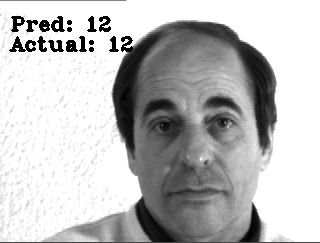

In [29]:
predict_image(test_images[10], test_ids[10])

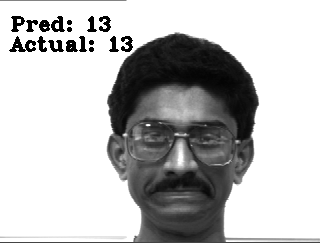

In [30]:
predict_image(test_images[20], test_ids[20])

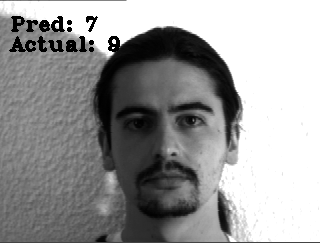

In [32]:
predict_image(test_images[25], test_ids[25])

In [38]:
# Let's check the accuracy
def check_accuracy(test_images):
  pred = []
  for test_image in test_images:
    pred.append(lbph_classifier.predict(test_image)[0])

  return pred

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
accuracy_score(test_ids, check_accuracy(test_images))

0.6666666666666666

<Axes: >

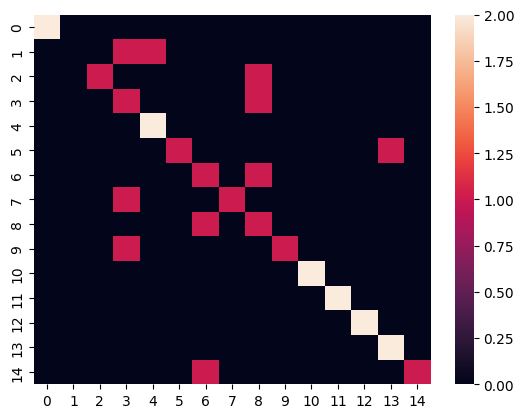

In [42]:
# Let's plot the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(test_ids, check_accuracy(test_images)))

Now let's learn some of the parameter of this trainer, First one is radius as shown in the figure

- **Radius(1):** Mean the number of neighbouring pixels to consider. Default is 1, so mean one pixel from 8 sides

- **Neighbour(8):** Number of neighbouring pixels to used

- **Threshold:** Confidence of detection. Higher the value, high the quality of facial recognition.

- **grid_x(8), grid_y(8):** Number of x pixels and y pixels to generate histogram



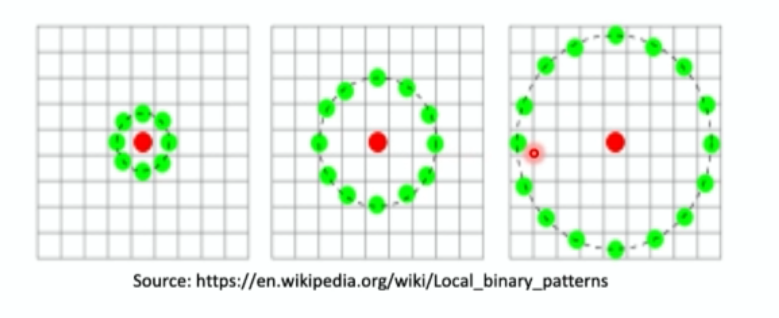

In [56]:
# Let's create a function to return accuracy that take the parameters
def get_accuracy(radius, neighbour, grid_x, grid_y):
  lbph_classifier = cv.face.LBPHFaceRecognizer_create(radius, neighbour, grid_x, grid_y)
  lbph_classifier.train(train_images, np.array(train_ids))
  lbph_classifier.write('lbph_classifier.yml')


  # Load
  lbph_classifier = cv.face.LBPHFaceRecognizer_create()
  lbph_classifier.read('lbph_classifier.yml')

  # Pred
  predicted_ids = []
  for test_image in test_images:
    predicted_id = lbph_classifier.predict(test_image)
    predicted_ids.append(predicted_id[0])

  # Accuracy
  accuracy = accuracy_score(test_ids, predicted_ids)
  return accuracy



In [57]:
get_accuracy(1,8,8,8) # The defaults one

0.6666666666666666

In [58]:
get_accuracy(2, 12,10,10)

0.6666666666666666

In [59]:
get_accuracy(4, 14, 9, 9)

0.7